In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
PATH = 'Crop_RecommendationDataset.csv'
df = pd.read_csv(PATH)

In [3]:
df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,Crops
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55.0,44.0,23.004459,82.320763,NaN,263.964248,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42.0,42.0,NaN,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,Crops
2195,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507,Tea
2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610,Tea
2197,118.0,33.0,30.0,24.131797,NaN,6.362608,173.322839,Tea
2198,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293,Tea
2199,104.0,18.0,30.0,23.603016,60.396475,6.779833,140.937041,Tea


In [5]:
df.size

17600

In [6]:
df.shape

(2200, 8)

In [7]:
df.columns

Index(['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'Crops'],
      dtype='object')

In [15]:
#Describe function used to find the total count,mean,Standard deviation,minimum value,maximum value
#20,50,70 percentage of the dataset value
df.describe()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
count,2163.000000,2139.000000,2135.000000,2137.000000,2129.000000,2048.000000,2158.000000
mean,50.803514,53.455820,48.329742,25.630062,71.537221,6.469706,103.439924
std,36.958470,33.045385,50.829464,5.054285,22.289645,0.776121,54.947556
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.791968,60.396475,5.964534,64.428291
50%,37.000000,51.000000,32.000000,25.601540,80.499799,6.425045,94.762562
75%,85.000000,68.000000,49.000000,28.558525,89.996156,6.928163,124.408005
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [16]:
#Showing Which rows are null value
null_rows= df[df.isnull().T.any().T]
null_rows

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,Crops
2,60.0,55.0,44.0,23.004459,82.320763,NaN,263.964248,rice
4,78.0,42.0,42.0,NaN,81.604873,7.628473,262.717340,rice
6,NaN,55.0,38.0,22.708838,82.639414,5.700806,271.324860,rice
8,89.0,54.0,38.0,24.515881,83.535216,6.685346,NaN,rice
14,94.0,50.0,37.0,25.665852,NaN,6.948020,209.586971,rice
...,...,...,...,...,...,...,...,...
2185,116.0,36.0,25.0,27.578476,NaN,6.172090,156.681037,Tea
2188,107.0,31.0,31.0,23.171246,52.978412,NaN,153.120164,Tea
2191,118.0,NaN,34.0,27.548230,62.881792,6.123796,181.417081,Tea
2192,106.0,21.0,35.0,NaN,57.041511,NaN,188.550654,Tea


In [17]:
#nullvalue specific column
null_specific_column=df[df['humidity'].isnull()]
null_specific_column

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,Crops
14,94.0,50.0,37.0,25.665852,NaN,6.948020,209.586971,rice
25,66.0,53.0,41.0,25.075635,NaN,7.778915,257.003887,rice
139,76.0,57.0,18.0,18.980273,NaN,6.092726,94.262494,Bhuta
200,40.0,72.0,77.0,NaN,NaN,7.485996,88.551231,Chola
297,36.0,56.0,83.0,18.897802,NaN,7.452671,69.095125,Chola
...,...,...,...,...,...,...,...,...
2102,83.0,38.0,35.0,25.708227,NaN,7.189156,136.732509,Tea
2126,86.0,26.0,27.0,27.131404,NaN,6.081173,192.428038,Tea
2169,111.0,28.0,26.0,27.773633,NaN,6.937353,192.712124,Tea
2185,116.0,36.0,25.0,27.578476,NaN,6.172090,156.681037,Tea


In [18]:
#duplicate rows
duplicate_rows= df[df.duplicated()]
duplicate_rows

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,Crops


In [19]:
#how many nulls
print(df.isnull().sum())

Nitrogen        37
phosphorus      61
potassium       65
temperature     63
humidity        71
ph             152
rainfall        42
Crops            0
dtype: int64


In [20]:
#remove null value /sub set(specify columns)
df = df.dropna(subset=['humidity','ph'])
df

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,Crops
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42.0,42.0,NaN,81.604873,7.628473,262.717340,rice
5,69.0,37.0,42.0,23.058049,83.370118,7.073454,251.055000,rice
...,...,...,...,...,...,...,...,...
2194,97.0,35.0,26.0,24.914610,53.741447,6.334610,166.254931,Tea
2195,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507,Tea
2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610,Tea
2198,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293,Tea


In [21]:
#all null values remove
df = df.dropna(how='any',axis=0)
df

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,Crops
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
5,69.0,37.0,42.0,23.058049,83.370118,7.073454,251.055000,rice
7,94.0,53.0,40.0,20.277744,82.894086,5.718627,241.974195,rice
...,...,...,...,...,...,...,...,...
2194,97.0,35.0,26.0,24.914610,53.741447,6.334610,166.254931,Tea
2195,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507,Tea
2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610,Tea
2198,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293,Tea


In [22]:
#applaing aging to check and showing null value
df.isnull().sum().sum()

0

In [23]:
#remove duplicate data
df.drop_duplicates(keep=False, inplace=True)
df

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,Crops
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
5,69.0,37.0,42.0,23.058049,83.370118,7.073454,251.055000,rice
7,94.0,53.0,40.0,20.277744,82.894086,5.718627,241.974195,rice
...,...,...,...,...,...,...,...,...
2194,97.0,35.0,26.0,24.914610,53.741447,6.334610,166.254931,Tea
2195,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507,Tea
2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610,Tea
2198,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293,Tea


In [24]:
#applaing aging to check and showing duplicate rows
duplicate_rows= df[df.duplicated()]
duplicate_rows

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,Crops


In [25]:
#applaing aging to check and showing duplicate rows
len(duplicate_rows)

0

In [26]:
df.dtypes

Nitrogen       float64
phosphorus     float64
potassium      float64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
Crops           object
dtype: object

<AxesSubplot:>

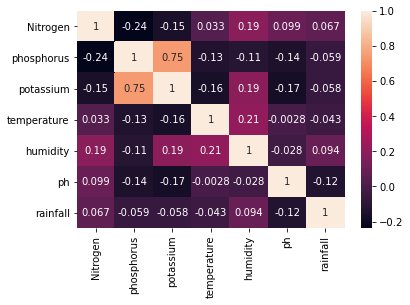

In [27]:
sns.heatmap(df.corr(),annot=True)

In [28]:
features = df[['Nitrogen', 'phosphorus','potassium','temperature', 'humidity', 'ph', 'rainfall']]
target = df['Crops']
labels = df['Crops']

In [29]:
acc = []
model = []

In [30]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

DecisionTree

In [31]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  86.24641833810888
                precision    recall  f1-score   support

        Banana       0.92      1.00      0.96        12
        Bhangi       0.95      1.00      0.98        21
         Bhuta       1.00      0.94      0.97        16
         Chola       1.00      0.94      0.97        16
        Dhalim       1.00      1.00      1.00        12
Khesharir Dhal       0.00      0.00      0.00        18
   Moshur Dhal       0.00      0.00      0.00        12
    Motorshuti       0.58      1.00      0.73        47
          Shim       1.00      1.00      1.00        15
           Tea       1.00      0.90      0.95        21
        Tormuj       0.93      1.00      0.96        13
         apple       1.00      1.00      1.00        24
       coconut       1.00      1.00      1.00        16
        cotton       0.92      1.00      0.96        12
        grapes       1.00      1.00      1.00        14
          jute       0.62      0.94      0.75        16

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [34]:
score

array([0.88252149, 0.88252149, 0.87106017, 0.84770115, 0.85057471])

In [35]:
import pickle
DT_pkl_filename = 'DecisionTree.pkl'
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
DT_Model_pkl.close()

Gaussian Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9856733524355301
                precision    recall  f1-score   support

        Banana       1.00      1.00      1.00        12
        Bhangi       1.00      1.00      1.00        21
         Bhuta       1.00      0.94      0.97        16
         Chola       1.00      1.00      1.00        16
        Dhalim       1.00      1.00      1.00        12
Khesharir Dhal       1.00      1.00      1.00        18
   Moshur Dhal       1.00      1.00      1.00        12
    Motorshuti       1.00      1.00      1.00        47
          Shim       1.00      1.00      1.00        15
           Tea       1.00      1.00      1.00        21
        Tormuj       1.00      1.00      1.00        13
         apple       1.00      1.00      1.00        24
       coconut       1.00      1.00      1.00        16
        cotton       0.92      1.00      0.96        12
        grapes       1.00      1.00      1.00        14
          jute       0.80      1.00      0.89        16


In [37]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99140401, 0.98567335, 0.99426934, 0.99425287, 0.99137931])

In [38]:
import pickle
NB_pkl_filename = 'NBClassifier.pkl'
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
NB_Model_pkl.close()

Support Vector Machine

In [39]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.1346704871060172
                precision    recall  f1-score   support

        Banana       0.00      0.00      0.00        12
        Bhangi       0.00      0.00      0.00        21
         Bhuta       0.00      0.00      0.00        16
         Chola       0.00      0.00      0.00        16
        Dhalim       0.00      0.00      0.00        12
Khesharir Dhal       0.00      0.00      0.00        18
   Moshur Dhal       0.00      0.00      0.00        12
    Motorshuti       0.13      1.00      0.24        47
          Shim       0.00      0.00      0.00        15
           Tea       0.00      0.00      0.00        21
        Tormuj       0.00      0.00      0.00        13
         apple       0.00      0.00      0.00        24
       coconut       0.00      0.00      0.00        16
        cotton       0.00      0.00      0.00        12
        grapes       0.00      0.00      0.00        14
          jute       0.00      0.00      0.00        16
        

In [40]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.14040115, 0.14326648, 0.14040115, 0.13793103, 0.1408046 ])

Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9111747851002865
                precision    recall  f1-score   support

        Banana       1.00      1.00      1.00        12
        Bhangi       1.00      1.00      1.00        21
         Bhuta       0.92      0.75      0.83        16
         Chola       1.00      1.00      1.00        16
        Dhalim       0.86      1.00      0.92        12
Khesharir Dhal       0.75      0.50      0.60        18
   Moshur Dhal       0.71      0.83      0.77        12
    Motorshuti       0.88      0.96      0.92        47
          Shim       1.00      1.00      1.00        15
           Tea       1.00      0.90      0.95        21
        Tormuj       1.00      1.00      1.00        13
         apple       1.00      1.00      1.00        24
       coconut       1.00      0.88      0.93        16
        cotton       0.73      0.92      0.81        12
        grapes       1.00      1.00      1.00        14
          jute       0.62      0.81      0.70   

In [42]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.9226361 , 0.91977077, 0.92550143, 0.94827586, 0.93103448])

In [43]:
import pickle
LR_pkl_filename = 'LogisticRegression.pkl'
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
LR_Model_pkl.close()

Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9856733524355301
                precision    recall  f1-score   support

        Banana       1.00      1.00      1.00        12
        Bhangi       1.00      1.00      1.00        21
         Bhuta       1.00      1.00      1.00        16
         Chola       1.00      1.00      1.00        16
        Dhalim       1.00      1.00      1.00        12
Khesharir Dhal       1.00      1.00      1.00        18
   Moshur Dhal       1.00      1.00      1.00        12
    Motorshuti       1.00      1.00      1.00        47
          Shim       1.00      1.00      1.00        15
           Tea       1.00      1.00      1.00        21
        Tormuj       1.00      1.00      1.00        13
         apple       1.00      1.00      1.00        24
       coconut       1.00      1.00      1.00        16
        cotton       1.00      1.00      1.00        12
        grapes       1.00      1.00      1.00        14
          jute       0.79      0.94      0.86        16
         

In [45]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.98853868, 0.99140401, 0.98567335, 0.99137931, 0.99137931])

In [46]:
import pickle
RF_pkl_filename = 'RandomForest.pkl'
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
RF_Model_pkl.close()

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

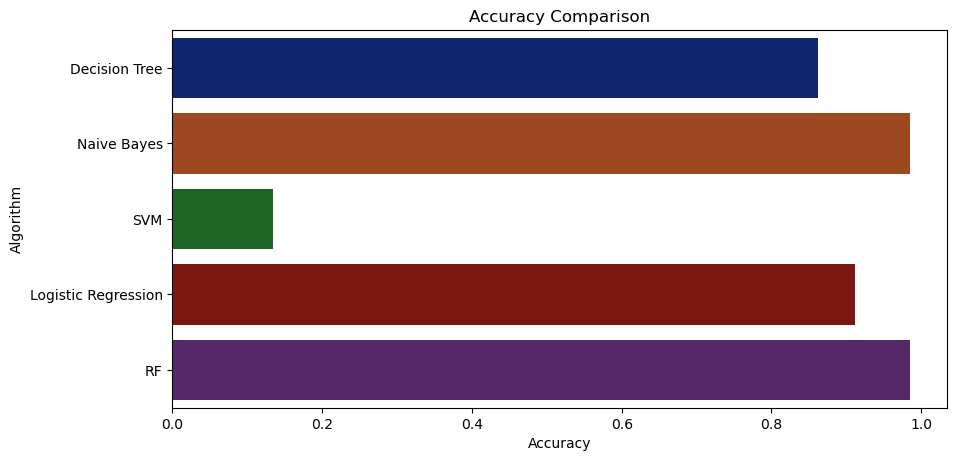

In [47]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [48]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.8624641833810889
Naive Bayes --> 0.9856733524355301
SVM --> 0.1346704871060172
Logistic Regression --> 0.9111747851002865
RF --> 0.9856733524355301


In [31]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [32]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']


In [33]:
data = np.array([[60, 50, 55, 77, 65.3, 5.0, 100.9]])
prediction = RF.predict(data)
print(prediction)

['maize']
